# Happymonk.ai assignment

In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
df = read_csv(path, header=None)
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
n_features = X.shape[1]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


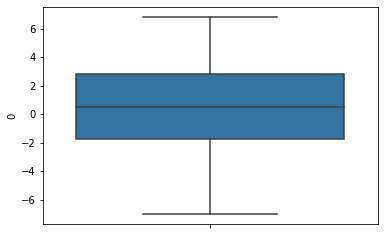

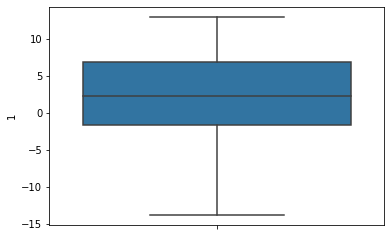

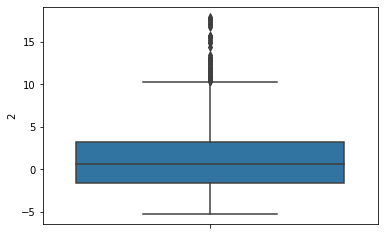

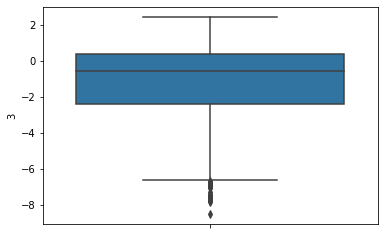

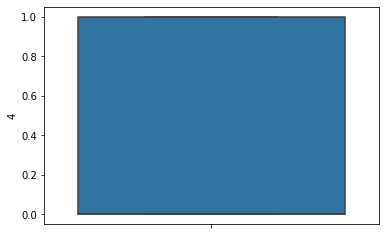

In [4]:
boxplot = df.select_dtypes([np.int64, np.float64])
for i, col in enumerate(boxplot.columns):
    plt.figure(i)
    sns.boxplot(y = col, data = boxplot)

# 8 epochs

9/9 [==============================] - 0s 2ms/step
Accuracy: 0.982


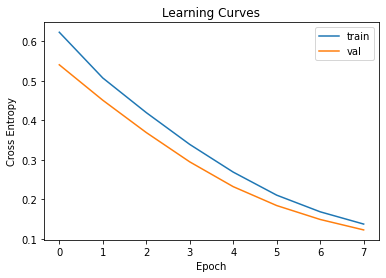

In [5]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(X_train, y_train, epochs=8, batch_size=32, verbose=0, validation_data=(X_test,y_test))
yhat = model.predict(X_test) >0.5
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [6]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

yhat_probs = model.predict(X_test, verbose=0)
yhat_classes = model.predict(X_test, verbose=0)>0.5
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.981818
Precision: 0.967213
Recall: 0.991597
F1 score: 0.979253
Cohens kappa: 0.963076
ROC AUC: 0.999138
[[152   4]
 [  1 118]]


# 12 epochs

9/9 [==============================] - 0s 3ms/step
Accuracy: 0.996


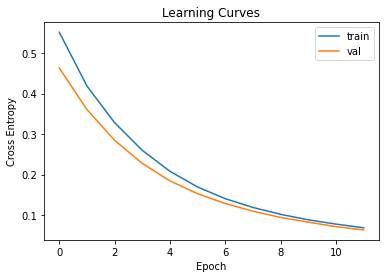

In [7]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(X_train, y_train, epochs=12, batch_size=32, verbose=0, validation_data=(X_test,y_test))
yhat = model.predict(X_test) >0.5
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [8]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

yhat_probs = model.predict(X_test, verbose=0)
yhat_classes = model.predict(X_test, verbose=0)>0.5
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.996364
Precision: 0.991667
Recall: 1.000000
F1 score: 0.995816
Cohens kappa: 0.992601
ROC AUC: 1.000000
[[155   1]
 [  0 119]]


# Hence 12 epochs give more accuracy over the data